# Gather

Gather data is the first step in wrangling data. We will gather data from three different sources and file formats.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import time
import json
import os
import re
from IPython.display import clear_output

## 1. Import Manually Downloaded Data

In [2]:
# Read the twitter-archive-enhanced.csv file and store it as dataframe in twitter_archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')
# Quick check to the file content and structure
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

**The file twitter-archive-enhanced.csv successfully stored in twitter_archive dataframe, it has 2356 entries and 17 columns**

## 2. Import Programmatically Downloaded Data

In [4]:
# download image_predictions.tsv file using the requests library
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [5]:
# read the downloaded file into a dataframe 'images_predictions'
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**The file image-predictions.tsv successfully downloaded and stored in image_predictions dataframe, it has 2075 entries and 12 columns**

## 3. Import Data from Twitter API

In [7]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,
                 parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)

In [8]:
error_list = []
query_success = 0

with open('tweet_json.txt', 'w', encoding = 'utf-8') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
        # get the start time of query
            start_time = time.time()
        # query each id using get_status
            tweet = api.get_status(tweet_id, tweet_mode='extended')
        # open the tweet_json.txt file in append mode
        
        # write each tweet's JSON data in a new line
            json.dump(tweet, file)
            file.write("\n")
            #file.write(json.dumps(tweet) + '\n')
        # count the success in querying the status
            query_success += 1
        # get the end time of query
            end_time = time.time()
            clear_output()
            print('Query for id {} successful. Time taken : {}'.format(tweet_id, end_time-start_time))
    
        # catch exceptions in error_list
        except Exception as e:
            error_list.append(tweet_id)
            #print error tweet id
            print(tweet_id)
        
        
        
        
        
    

print(end_time - start_time)
print('Completed.')


Query for id 666020888022790149 successful. Time taken : 0.16864895820617676
0.16864895820617676
Completed.


In [9]:
error_list

[888202515573088257,
 873697596434513921,
 872668790621863937,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 812747805718642688,
 802247111496568832,
 775096608509886464,
 770743923962707968,
 754011816964026368,
 680055455951884288]

In [10]:
# lengh of the result
print("Successful number of query", query_success)
# The tweet_id of the errors
print("Unsuccessful number of query", len(error_list))

Successful number of query 2340
Unsuccessful number of query 16


**We get 2340 tweet id successfully with 16 exceptions results stored in errors_list**

In [11]:
# read this tweet_json.txt file line by line into a DataFrame 
df_list = []
with open('tweet_json.txt') as file:
    for line in file:
        try:
            tweet = json.loads(line)
            df_list.append(tweet)
        except:
            continue
df_api = pd.DataFrame(df_list, columns=list(df_list[0].keys()))
df_api.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8298,37982,False,False,False,False,en
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,6126,32610,False,False,False,False,en
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,4056,24557,False,False,False,False,en
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,8438,41310,False,False,False,False,en
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,None,None,False,9138,39504,False,False,False,False,en


In [12]:
df_api.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang'],
      dtype='object')

In [13]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 27 columns):
created_at                       2340 non-null object
id                               2340 non-null int64
id_str                           2340 non-null object
full_text                        2340 non-null object
truncated                        2340 non-null bool
display_text_range               2340 non-null object
entities                         2340 non-null object
extended_entities                2067 non-null object
source                           2340 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null object
in_reply_to_screen_name          77 non-null object
user                             2340 non-null object
geo                              0 non-null object
coordinates                      0 non-null

In [14]:
# Enclude unnecessary columns in df_api
df_api = df_api[['id', 'retweet_count', 'favorite_count']]
df_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8298,37982
1,892177421306343426,6126,32610
2,891815181378084864,4056,24557
3,891689557279858688,8438,41310
4,891327558926688256,9138,39504


In [15]:
# save the dataframe to a csv file
df_api.to_csv('favorite_retweet_count.csv', index=False)

In [16]:
# convert the list of exceptions into error DataFrame
error = pd.DataFrame(error_list, columns = ['tweet_id'])
error.head()

,tweet_id
0,888202515573088257
1,873697596434513921
2,872668790621863937
3,869988702071779329
4,866816280283807744


**File favorite_retweet_count.csv has been successfully downloaded and stored in the df_api dataframe, which has 2340 entries and 3 columns. In addition, if further investigation is required, the exception results are stored in the error dataframe**

### Gather Summary

`Requirements`


Data is successfully gathered:
- From at least the three (3) different sources on the Project Details page.
- In at least the three (3) different file formats on the Project Details page.
- Each piece of data is imported into a separate pandas DataFrame at first.

`Outcomes`

**Successfully gathering data from three different sources and file formats.**



  - Manually downloaded a file (`twitter-archive-enhanced.csv`) 
       
       Using Pandas to Read from csv file to a DataFrame (`twitter_archive`)
       
       
       
  - Programmatically Downloaded a file from the Internet (`image-predictions.tsv`) 
     
       Using requests to download file and using Pandas to read from csv file to a DataFrame (`image_predictions`)
       
       
       
  - Querying an API to get required data (`tweet_json.txt`) 
     
       Using Tweepy to query Twitter API and read the .txt file line by line into a DataFrame(`df_api`)

# Assess

Data quality and tidiness issues will be assessed visually and programmatically after obtaining the required data and then detect and document problems based on quality and cleanliness issues.

In [17]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8')
image = pd.read_csv('image-predictions.tsv', sep='\t')
df_api = pd.read_csv('favorite_retweet_count.csv')

## Visual Assessment

In [18]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [19]:
image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
df_api.head()

,id,retweet_count,favorite_count
0,892420643555336193,8298,37982
1,892177421306343426,6126,32610
2,891815181378084864,4056,24557
3,891689557279858688,8438,41310
4,891327558926688256,9138,39504


## Programatic Assessment

In [21]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
sum(twitter_archive.duplicated())

0

In [23]:
twitter_archive['tweet_id'].nunique()

2356

In [24]:
twitter_archive['retweeted_status_id'].nunique()

181

In [25]:
twitter_archive['expanded_urls'].nunique()

2218

In [26]:
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [27]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
sum(image.duplicated())

0

In [29]:
len(image.query('p1_dog == False and p2_dog == False and p3_dog == False'))

324

In [30]:
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
id                2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [31]:
sum(df_api.duplicated())

0

### Tidiness
structural issues

- three tables should be merged to one master dataset

**`images dataset`**
- four stages of dogs in columns instead of one column






### Quality
content issues


**`twitter_archive dataset`**

- We only want original tweets (no retweets).
- rows with NaN values in `expanded_urls`do not have iamges
- `tweet_id`,`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` should be `string` format

-  `timestamp` and `retweeted_status_timestamp` are in `string` format instead of `datetime`

- url in `source` contain unnecessary html elements
- `source` should be category data type
- `stages`  sould be category data type


**`images dataset`**

- Contain many rows that do not successfully be identified as dog breed by the neural network
- Dog breeds contain unnecessary "_" characters and first letters are not upper cases.
- There is a useless column `img_num`


**`df_api`**

- column name `id` should be `tweet_id` 

### Asses Summary

- **Visual assessment**
    
    
    Each collected data is displayed in a Jupyter notebook and be assessed in an external application(google sheet and Excel) for visual assessment
  
    
- **Programmatic assessment**



    `pandas' functions` are used to assess the data:
       - .head()
       - .info()     
       - .nunique()
       - .duplicated()
- **Detect and document isssues based on quality and tidiness**



  `Classification of documented 11 data quality issues`
       - Missing values in rows 
       - Redundant columns that are unnecessary for analysis
       - Redundant html tags in values
       - Incorrect data types
       - Incorrect column name
       - Inconsistent upper and lower case
       - Unnecessary characters in values
       - Unnecessary retweet data
     
     
  `Classification of documented 2 tidiness issues`
       - Separate tables should convert to one dataframe
       - Redundant columns that should be convert to one column


# Clean

Cleaning the data is the third step in the data wrangling. We will fix the quality and cleanliness we found in our assessment. In the cleaning step, we will solve the problems by using the `Define`,`Code` and `Test` steps to ensure that we completely and systematically solved all the problems we recorded earlier., we will start handling tidiness issues and then fixing cleanliness issues.

### Preparation for cleaning

In [32]:
#copy data before cleaning
twitter_archive_clean = twitter_archive.copy()
image_clean = image.copy()
df_api_clean = df_api.copy()

**Copies of the original pieces of data are made prior to cleaning.**



In [33]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Tidiness

### **`twitter_archive dataset`**:We don't need reweet records.

##### Define

- Drop retweet rows 
- Drop`retweeted_status_id`,`retweeted_status_user_id`and `retweeted_status_timestamp` columns

##### Code

exclude retweeted tweet and store cleaned rows in twitter_archive_clean

In [34]:
twitter_archive_clean = twitter_archive_clean.query('retweeted_status_id == "NaN"')

##### Test

In [35]:
len(twitter_archive_clean.query('retweeted_status_id != "NaN"'))

0

##### Define

- Drop `retweeted_status_id`,`retweeted_status_user_id`and `retweeted_status_timestamp`columns

##### Code

In [36]:
twitter_archive_clean.drop(labels=['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'],
                           axis=1,
                           inplace=True)

##### Test

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### **`twitter_archive dataset`**: dog stage (doggo, floofer, pupper, puppo)should convert to one column

##### Define

- Create `stages` column by extracting the keywords in text column 
- Drop the doggo, floofer, pupper, puppo columns.

##### Code

In [38]:
# using .extract to create stages column
twitter_archive_clean['stages'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)

In [39]:
twitter_archive_clean.drop(labels=['doggo', 'floofer', 'pupper', 'puppo'],
                           axis=1,
                           inplace=True)

##### Test

In [40]:
twitter_archive_clean.stages.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: stages, dtype: int64

In [41]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
stages                   364 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


### **`twitter_archive `** :  ` stages` column sould be categorical format

##### Define

- using astype to convert string data type to category

##### Code

In [42]:
twitter_archive_clean['stages'] = twitter_archive_clean['stages'].astype('category')

##### Test

In [43]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
stages                   364 non-null category
dtypes: category(1), float64(2), int64(3), object(5)
memory usage: 189.2+ KB


### **`df_api`** : rename `id` to `tweet_id`

##### Define

- Rename `id` column to `tweet_id`in `df_api`table

##### Code

In [44]:
#using .rename to rename id column
df_api_clean = df_api_clean.rename(columns={'id': 'tweet_id', 'retweet_count': 'retweet_count','favorite_count':'favorite_count'})

##### Test

In [45]:
df_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id          2340 non-null int64
retweet_count     2340 non-null int64
favorite_count    2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


### All tables should be merged in one master dataset

##### Define

- Merge `twitter_archive` table with `df_api` table using inner merge. 

##### Code

In [46]:
twitter_archive_clean = pd.merge(twitter_archive_clean, df_api_clean, on='tweet_id', how='inner')

##### Test

In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 13 columns):
tweet_id                 2173 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2173 non-null object
source                   2173 non-null object
text                     2173 non-null object
expanded_urls            2115 non-null object
rating_numerator         2173 non-null int64
rating_denominator       2173 non-null int64
name                     2173 non-null object
stages                   364 non-null category
retweet_count            2173 non-null int64
favorite_count           2173 non-null int64
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 223.0+ KB


##### Define

- Merge `twitter_archive` table with `image` table using inner merge

##### Code

In [48]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_clean, on='tweet_id', how='inner')

##### Test

In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 24 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null object
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
stages                   326 non-null category
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf                  19

### Quality

### **`twitter_archive dataset`**:`tweet_id`,`in_reply_to_status_id`, `in_reply_to_user_id`, should be string format

##### Define

- Using .astype to convert tweet_id,in_reply_to_status_id and in_reply_to_user_id to string datatype

##### Code

In [50]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')
twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean['in_reply_to_status_id'].astype('str')
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean['in_reply_to_user_id'].astype('str')

##### Test

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 24 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    1992 non-null object
in_reply_to_user_id      1992 non-null object
timestamp                1992 non-null object
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
stages                   326 non-null category
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf                 

### **`twitter_archive dataset`**: `timestamp` and `retweeted_status_timestamp` are in `string` format instead of `datetime`

##### Define

- using to_datetime to convert string to datetime in timestamp 

##### Code

In [52]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean.timestamp)

##### Test

In [53]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 24 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    1992 non-null object
in_reply_to_user_id      1992 non-null object
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
stages                   326 non-null category
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf         

### **`twitter_archive dataset`** : url in `source` contain unnecessary html elements

##### Define

Remove html elements using regular expression and .replace() methond

##### Code

In [54]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.replace(r'<[^>]*>', '')

##### Test

In [55]:
twitter_archive_clean['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'], dtype=object)

In [56]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone    1954
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

### **`twitter_archive dataset`** : `source` should be category data type

##### Define

- using astype to convert strings to category

##### Code

In [57]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')

##### Test

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 24 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    1992 non-null object
in_reply_to_user_id      1992 non-null object
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null category
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
stages                   326 non-null category
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf       

### **`twitter_archive `** : Filter and store tweets with images

##### Define

- drop NaN rows in `expanded_urls` column

##### Code

In [59]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['expanded_urls'].notnull()]

##### Test

In [60]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 24 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    1992 non-null object
in_reply_to_user_id      1992 non-null object
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null category
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null int64
rating_denominator       1992 non-null int64
name                     1992 non-null object
stages                   326 non-null category
retweet_count            1992 non-null int64
favorite_count           1992 non-null int64
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf       

### **`twitter_archive dataset`** : Contain many rows that do not successfully identified as dog breed by the neural network

##### Define

- using .query to exclude rows that contain all False in perdiction columns.

##### Code

In [61]:
twitter_archive_clean = twitter_archive_clean.query('p1_dog == True or p2_dog == True or p3_dog == True')

##### Test

In [62]:
twitter_archive_clean.query('p1_dog == False and p2_dog == False and p3_dog == False')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


### **`twitter_archive dataset`** : Removing irrelevant column `img_num` 

##### Define

- Drop `img_num` column

##### Code

In [63]:
twitter_archive_clean.drop(labels='img_num',
                 axis=1,
                 inplace=True)

##### Test

In [64]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,nan,nan,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False


### **`twitter_archive dataset`** : Retain only one column of prediction breed 

##### Define

- drop `p1_conf`,`p1_dog`,`p2`,`p2_conf`,`p2_dog`,`p3`,`p3_conf`,`p3_dog` columns

##### Code

In [65]:
twitter_archive_clean.drop(labels=['p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],
                  axis=1,
                  inplace=True)
                 

##### Test

In [66]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,retweet_count,favorite_count,jpg_url,p1
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6126,32610,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4056,24557,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8438,41310,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9138,39504,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset
5,891087950875897856,nan,nan,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,3042,19851,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever


### **`twitter_archive dataset`** : Inconsistent string format in `p1`

Dog breeds contain unnecessary "_" characters and not all first letters of breeds are upper case.

##### Define

- using str.capitalize() to convert first letter in `p1` to be upper case

##### Code

In [67]:
twitter_archive_clean['p1'] = twitter_archive_clean['p1'].str.capitalize()

##### Test

In [68]:
twitter_archive_clean['p1'].sample(10)

877           Toy_poodle
28        French_bulldog
626      German_shepherd
1426    Golden_retriever
127      German_shepherd
401     Golden_retriever
147            Chihuahua
493       Cocker_spaniel
163               Barrow
139     Golden_retriever
Name: p1, dtype: object

##### Define

- using .replace to remove "_" 

##### Code

In [69]:
twitter_archive_clean['p1'].replace(regex=True,inplace=True,to_replace="_",value=r' ')

##### Test

In [70]:
twitter_archive_clean['p1'].sample(10)

1107                       Shih-tzu
1189                  Saint bernard
405              Norwegian elkhound
1109                Norfolk terrier
1601                         Beagle
605                         Basenji
1607    West highland white terrier
217                          Kelpie
1393                 French bulldog
1193           Bernese mountain dog
Name: p1, dtype: object

### **`twitter_archive dataset`** : Remae `p1` to `dog_breed`

##### Define

- using .rename to change the column name to dog_breed

##### Code

In [71]:
twitter_archive_clean = twitter_archive_clean.rename(columns={'tweet_id': 'tweet_id', 'jpg_url': 'jpg_url','p1':'dog_breed'})

##### Test

In [72]:
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stages', 'retweet_count',
       'favorite_count', 'jpg_url', 'dog_breed'],
      dtype='object')

In [73]:
df_master = twitter_archive_clean

**Store combined and cleaned data in `df_master` dataframe**

### Clean Summary

- **A tidy master dataset with all pieces of gathered data is created.**


   `df_master` 
   
   
   


    
- **All issues identified in the assess phase are successfully cleaned.**


`Classification of documented 11 data quality issues`
   - Missing values in rows  (drop these rows by using .notnull() to filter Non-Null rows)
   - Redundant columns that are unnecessary for analysis (drop these columns by using .drop())
   - Redundant html tags in values (extract useful data by using .extract() and Regular Expression)
   - Incorrect data types (convert to proper data type by using .astype())
   - Incorrect column name (nemae column name by using .rename() )
   - Inconsistent upper and lower case(convert to capital letter by using .capitalize())
   - Unnecessary characters in values (exclude unnecessary parts by using .replace() and Regular Expression)
   - Unnecessary retweet data (drop columns by using .drop())
     
     
   `Classification of documented 2 tidiness issues`
   - Separate tables should convert to one dataframe (merge tables by using .merge())
   - Redundant columns that should be convert to one column (Create a new column and extract keywords using .extract())


# Storing and Acting on Wrangled Data

## Storing Cleanded data

In [74]:
twitter_archive_clean.to_csv('twitter_archive_master.csv')

## Analysing and visualizing

In [75]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [76]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [77]:
df_master.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stages,retweet_count,favorite_count,jpg_url,dog_breed
0,1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6126,32610,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua
1,2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4056,24557,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua
2,3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8438,41310,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Paper towel
3,4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9138,39504,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset
4,5,891087950875897856,NaN,NaN,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,NaN,3042,19851,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake bay retriever


In [78]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684 entries, 0 to 1683
Data columns (total 16 columns):
Unnamed: 0               1684 non-null int64
tweet_id                 1684 non-null int64
in_reply_to_status_id    20 non-null float64
in_reply_to_user_id      20 non-null float64
timestamp                1684 non-null object
source                   1684 non-null object
text                     1684 non-null object
expanded_urls            1684 non-null object
rating_numerator         1684 non-null int64
rating_denominator       1684 non-null int64
name                     1684 non-null object
stages                   274 non-null object
retweet_count            1684 non-null int64
favorite_count           1684 non-null int64
jpg_url                  1684 non-null object
dog_breed                1684 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 210.6+ KB


### 1. Most Common Names In WeRateDogs

I would like to find out what are the common names in these tweets. I use `.value_counts()` to count the number in the `name` column and store the result in `names` variable.

In [79]:
# set data
common_names = df_master['name'].value_counts()[2:11]
common_names

Cooper     10
Lucy       10
Oliver      9
Tucker      9
Charlie     9
Penny       8
Sadie       7
the         7
Daisy       7
Name: name, dtype: int64

In [80]:
#set index and values in names to X,y
X = common_names.index
y = common_names.values
df = pd.DataFrame({"X":X, "y":y})

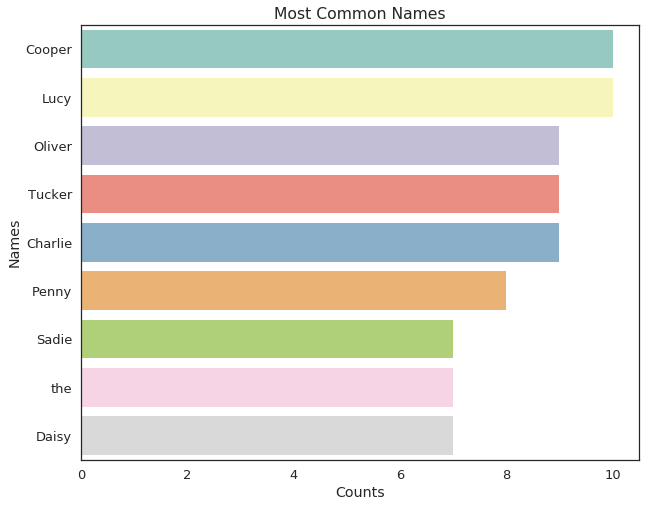

In [81]:
#plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes
sb.set(style='white',context="talk")
sb.barplot("y", "X", palette="Set3", data=df)
plt.xlabel("Counts")
plt.ylabel("Names")
plt.title("Most Common Names")
plt.show();

The most common names are Lucy and Cooper, and there are 10 tweets containing these names. Oliver, Charlie and Tuck appeared eight times. Penny, Daisy, Sadie and Winston are also common in dog owners' naming choices. In the following parts, I would like to figure out the most common breeds that appeared in these tweets.

### 2. Most Common Breeds In WeRateDogs

Use the same method as previous part.

In [82]:
# set data
common_breed = df_master['dog_breed'].value_counts()[0:10]
common_breed

Golden retriever      139
Labrador retriever     95
Pembroke               88
Chihuahua              79
Pug                    54
Chow                   41
Samoyed                39
Pomeranian             38
Toy poodle             38
Malamute               29
Name: dog_breed, dtype: int64

In [83]:
#set index and values in names to X,y
X = common_breed.index
y = common_breed.values
df = pd.DataFrame({"X":X, "y":y})

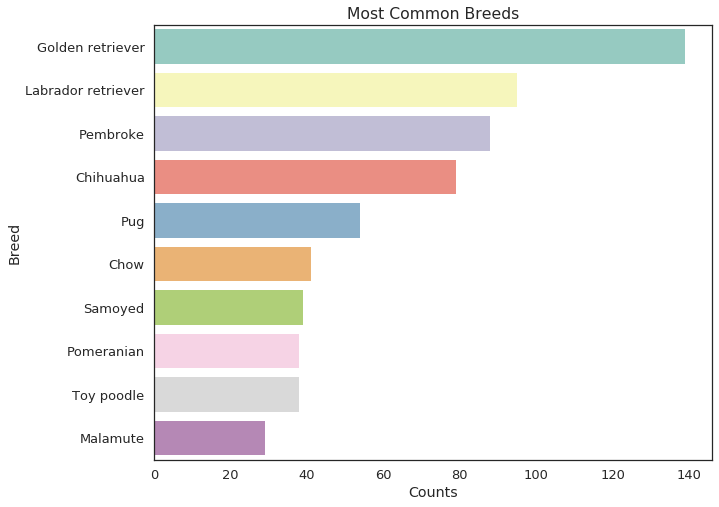

In [84]:
#plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes
sb.set(style='white',context="talk")
sb.barplot("y", "X", palette="Set3", data=df)
plt.xlabel("Counts")
plt.ylabel("Breed")
plt.title("Most Common Breeds")
plt.show();

Golden Retriever is the most common of these Twitter users, of which 139 are this breed. Labrador, Pembroke, and Chihuahua are also very popular with dog owners. Next, I want to find the most popular breeds from calculating the sum of their favorite counts in tweets, and then we can compare the most common ones with the most popular ones. I think that when it comes to online tweets, people's dog preferences and choices in real-life will continue to exist.

### 3. Most Popular Breeds In WeRateDog

I chose to calculate the sum of the favorite count of each breed as a metric to measure the popularity of the breed.

In [85]:
# Use groupby to filter dog_breed and sum of favorite_count
top10_breeds= df_master.groupby('dog_breed').sum()['favorite_count'] .sort_values(ascending=False)[0:10]

In [86]:
#set index and values in top10_breeds to X,y
X = top10_breeds.index
y = top10_breeds.values
df = pd.DataFrame({"X":X, "y":y})

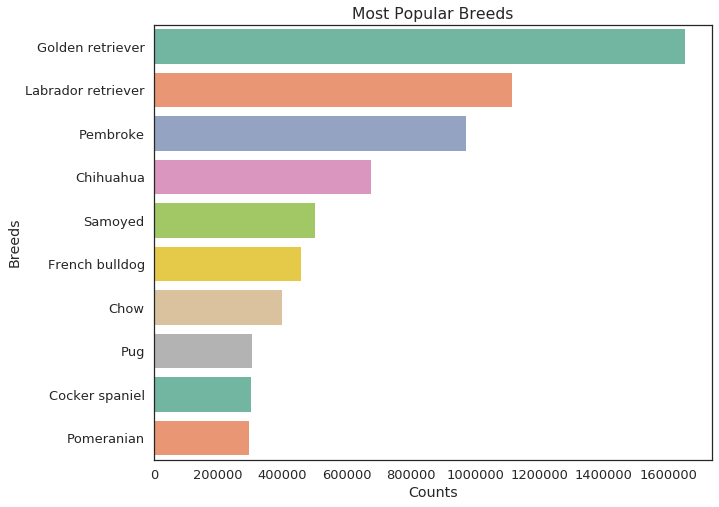

In [87]:
#plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes
sb.set(style='white',context="talk")
sb.barplot("y", "X", palette="Set2", data=df)
plt.xlabel("Counts")
plt.ylabel("Breeds")
plt.title("Most Popular Breeds")
plt.show();

### 4. Most Common vs. Most Popular Breeds

In [88]:
# set data
df_top10_breeds= pd.DataFrame(top10_breeds)
df_common_breed = pd.DataFrame(common_breed)

In [89]:
# using .join to combine df_top10_breeds and df_common_breed  
df_combine = df_top10_breeds.join(df_common_breed,how='outer')
# using .sort_values to reest the order according the favorite count
df_combine= df_combine.sort_values(by='favorite_count',ascending=False)
#reset index and rename the columns's names
df_combine.reset_index(inplace=True)      
df_combine.columns=['breed','favorite_count','dog_breed_count']

In [90]:
df_combine

,breed,favorite_count,dog_breed_count
0,Golden retriever,1652965.0,139.0
1,Labrador retriever,1113547.0,95.0
2,Pembroke,972011.0,88.0
3,Chihuahua,674865.0,79.0
4,Samoyed,502589.0,39.0
5,French bulldog,457242.0,NaN
6,Chow,397854.0,41.0
7,Pug,306188.0,54.0
8,Cocker spaniel,302045.0,NaN
9,Pomeranian,296206.0,38.0


we can see from the above table that Golden retriever, Labrador retriever, Pembroke, and Chihuahua remain the top four in both metrics. Although French bulldog and Cocker spaniel receive many favorite counts, there are few Twitter users actually keep these breeds. On the contrary, Malamute and Toy poodle are the tenth and ninth common breeds but they did not enter the top ten of popular breeds on WeRateDog.

### 4. Most Retweeted Breeds In WeRateDogs

In [91]:
# Use groupby to filter dog_breed and sum of retweet_count
top10_breeds_retweet= df_master.groupby('dog_breed').sum()['retweet_count'] .sort_values(ascending=False)[0:10]

In [92]:
#set index and values in top10_breeds_retweet to X,y
X = top10_breeds_retweet.index
y = top10_breeds_retweet.values
df = pd.DataFrame({"X":X, "y":y})

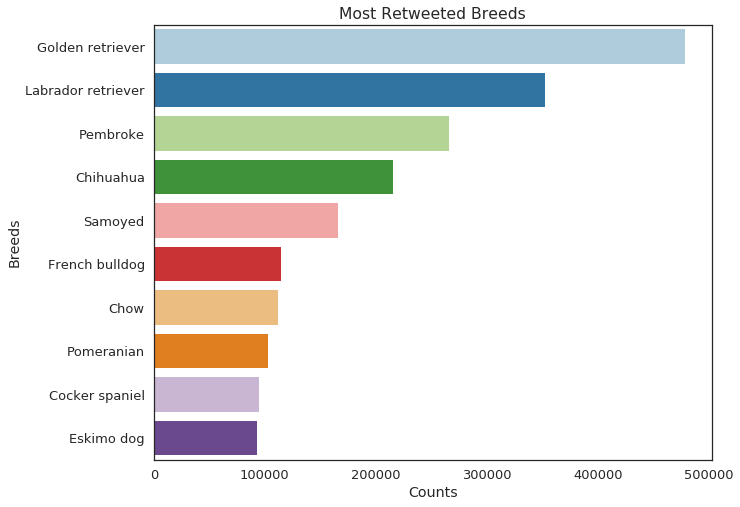

In [93]:
#plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes
sb.set(style='white',context="talk")
sb.barplot("y", "X", palette="Paired", data=df)
plt.xlabel("Counts")
plt.ylabel("Breeds")
plt.title("Most Retweeted Breeds")
plt.show();

### 5. Most Retweeted Breeds vs. Most Popular Breeds

As before, I want to compare the retweet metrics with the favorite count metric to see if there is a difference between these preferences.

In [94]:
# set data
df_top10_breeds= pd.DataFrame(top10_breeds)
df_top10_breeds_retweet = pd.DataFrame(top10_breeds_retweet)

In [95]:
# using .join to combine df_top10_breeds and df_common_breed  
df_combine2 = df_top10_breeds.join(df_top10_breeds_retweet,how='outer')
# using .sort_values to reest the order according the favorite count
df_combine2= df_combine2.sort_values(by='favorite_count',ascending=False)
df_combine2.reset_index(inplace=True)
df_combine2.columns=['breed','favorite_count','retweet_count']
df_combine2

,breed,favorite_count,retweet_count
0,Golden retriever,1652965.0,478762.0
1,Labrador retriever,1113547.0,352656.0
2,Pembroke,972011.0,266174.0
3,Chihuahua,674865.0,215331.0
4,Samoyed,502589.0,165665.0
5,French bulldog,457242.0,114855.0
6,Chow,397854.0,112111.0
7,Pug,306188.0,NaN
8,Cocker spaniel,302045.0,94591.0
9,Pomeranian,296206.0,102469.0


The same result as before. The top four rankings among popular varieties are still in the top four. In particular, the Golden Retriever ranks first in all of the top ten lists, and the number is amazing. Pug receives a lot of favorite counts, but few users tend to retweet for them. Eskimo dogs did not appear in the top ten of the rankings but ranked tenth in the retweet list.